In [1]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import geopandas
import censusdata
import numpy as np
from census import Census
import us
from ipywidgets import interact, interact_manual, Dropdown, IntSlider

In [2]:
# path = r'C:/Users/ShrekTheOger/Documents/GitHub/Data-II-Project'
path = r'/Users/bowenli/Documents/GitHub/Data-II-Project'
# path = r'C:\Users\engel\Documents\GitHub\Data-II-Project'

In [3]:
# references 
# https://towardsdatascience.com/mapping-us-census-data-with-python-607df3de4b9c
# https://pypi.org/project/CensusData/
# https://towardsdatascience.com/using-the-us-census-api-for-data-analysis-a-beginners-guide-98063791785c

# function for retrieving population data
def get_acs5_county_population(year):
    data = censusdata.download('acs5', year, censusdata.censusgeo([('county', '*')]),
                               ['B05002_001E', 'B05002_002E', 'B05002_003E', 'B05002_004E', 'B05002_009E', 'B05002_013E'])
    
    # create dictionary for the column names
    column_names = {'B05002_001E': 'total_population', 'B05002_002E': 'total_native', 
                    'B05002_003E': 'total_born_in_state', 'B05002_004E': 'total_born_out_state',
                    'B05002_009E': 'total_born_outside_US', 'B05002_013E': 'total_foreign_born'}
    
    # create new column for county name and state name, the index would be FIPS codes 
    new_indices = []
    county_names = []
    county_ids = []
    state_names = []
    state_ids = []
    
    
    for index in data.index.tolist():
        new_index = index.geo[0][1] + index.geo[1][1]
        new_indices.append(new_index)
        county_name = index.name.split(',')[0]
        county_names.append(county_name)
        state_name = index.name.split(',')[1]
        state_names.append(state_name)
        state_id = index.geo[0][1]
        state_ids.append(state_id)
        county_id = index.geo[1][1]
        county_ids.append(county_id)

    data.index = new_indices
    data['county_name'] = county_names
    data['state_name'] = state_names
    data['county_id'] = county_ids
    data['state_id'] =  state_ids
    data['year'] =  year
    
    # replace column names 
    data = data[['year', 'state_name', 'county_name', 'state_id', 'county_id', 'B05002_001E',
                 'B05002_002E', 'B05002_003E', 'B05002_004E', 'B05002_009E', 'B05002_013E']]
    data = data.rename(column_names, axis=1) 
    return data

In [4]:
# function for retrieving income data
def get_acs5_county_income(year):
    data = censusdata.download('acs5', year, censusdata.censusgeo([('county', '*')]), ['B19301_001E'])
    
    # create dictionary for the column names
    column_names = {'B19301_001E': 'income_past12m'}
    
    # create new column for county name and state name, the index would be FIPS codes 
    new_indices = []
    county_names = []
    county_ids = []
    state_names = []
    state_ids = []
    
    for index in data.index.tolist():
        new_index = index.geo[0][1] + index.geo[1][1]
        new_indices.append(new_index)
        county_name = index.name.split(',')[0]
        county_names.append(county_name)
        state_name = index.name.split(',')[1]
        state_names.append(state_name)
        state_id = index.geo[0][1]
        state_ids.append(state_id)
        county_id = index.geo[1][1]
        county_ids.append(county_id)

    data.index = new_indices
    data['county_name'] = county_names
    data['state_name'] = state_names
    data['county_id'] = county_ids
    data['state_id'] =  state_ids
    data['year'] =  year
    
    # replace column names 
    data = data[['year', 'state_name', 'county_name', 'state_id', 'county_id', 'B19301_001E']]
    data = data.rename(column_names, axis=1) 
    return data

In [5]:
# create a list of years that we want to study
years = list(range(2010, 2020))

In [6]:
# create population dataframe from 2010 to 2019
df_population = pd.DataFrame()

for year in years: 
    population_year = get_acs5_county_population(year) 
    df_population = df_population.append(population_year)
    
df_population.reset_index(drop = True)

year    state_name       county_name state_id county_id  \
0      2010   Puerto Rico  Manatí Municipio       72       091   
1      2010    California     Merced County       06       047   
2      2010    California      Modoc County       06       049   
3      2010    California       Mono County       06       051   
4      2010    California   Monterey County       06       053   
...     ...           ...               ...      ...       ...   
32199  2019     Tennessee   Crockett County       47       033   
32200  2019     Tennessee       Lake County       47       095   
32201  2019     Tennessee       Knox County       47       093   
32202  2019    Washington     Benton County       53       005   
32203  2019    Washington      Clark County       53       011   

       total_population  total_native  total_born_in_state  \
0                 44631         44368                    0   
1                250699        188498               156434   
2                  9605          8971                 6067   
3                 13905         11341                 7059   
4                407435        284647               208218   
...                 ...           ...                  ...   
32199             14399         13774                11231   
32200              7401          7307                 5436   
32201            461104        438362               272843   
32202            197518        176385               104182   
32203            473252        423305               165377   

       total_born_out_state  total_born_outside_US  total_foreign_born  
0                      2638                  41730                 263  
1                     29768                   2296               62201  
2                      2882                     22                 634  
3                      4108                    174                2564  
4                     69900                   6529              122788  
...                     ...                    ...                 ...  
32199                  2490                     53                 625  
32200                  1839                     32                  94  
32201                161946                   3573               22742  
32202                 70549                   1654               21133  
32203                251903                   6025               49947  

[32204 rows x 11 columns]

In [7]:
# create income dataframe from 2010 to 2019
df_income = pd.DataFrame()

for year in years: 
    income_year = get_acs5_county_income(year) 
    df_income = df_income.append(income_year)
    
df_income.reset_index(drop = True)

year    state_name       county_name state_id county_id  income_past12m
0      2010   Puerto Rico  Manatí Municipio       72       091          8949.0
1      2010    California     Merced County       06       047         18041.0
2      2010    California      Modoc County       06       049         20536.0
3      2010    California       Mono County       06       051         27321.0
4      2010    California   Monterey County       06       053         25776.0
...     ...           ...               ...      ...       ...             ...
32199  2019     Tennessee   Crockett County       47       033         23771.0
32200  2019     Tennessee       Lake County       47       095         15732.0
32201  2019     Tennessee       Knox County       47       093         33229.0
32202  2019    Washington     Benton County       53       005         32882.0
32203  2019    Washington      Clark County       53       011         35860.0

[32204 rows x 6 columns]

In [8]:
# turns out the table is slightly different so I couldn't generalized 
# but here is the generalized funciton that I tried 
def get_nhgis_county_income(path, folder, fname):
    data = os.path.join(path, folder, fname)
    income = pd.read_csv(data)
    
    income = income.drop(['ANRCA', 'AIANHHA', 'RES_ONLYA', 'TRUSTA',
                          'RES_TRSTA', 'BLCK_GRPA', 'TRACTA', 'CD101A',
                          'C_CITYA', 'CTY_SUBA', 'PLACEA', 'PMSAA',
                          'URB_AREAA', 'ZIPA', 'CD103A', 'COUNTY',
                          'DIVISIONA', 'MSA_CMSAA', 'REGIONA', 'URBRURALA'], axis=1)
    
    names_income = {'E01001': 'per_capita_income'}
    
    income = income.rename(names_income, axis=1) 
    income = income.iloc[2:]
    income = income.reset_index(drop = True)
    income['index'] = income['STATEA'] + income['COUNTYA']
    
    return income

In [9]:
income_1990_data = get_nhgis_county_income(path, 'IPUMS NHGIS', 'income_1990_county.csv')

In [10]:
income_1990 = os.path.join(path, 'IPUMS NHGIS', 'income_1990_county.csv')
income_1990_data = pd.read_csv(income_1990)

income_1990_data = income_1990_data.drop(['ANRCA', 'AIANHHA', 'RES_ONLYA', 'TRUSTA',
                                          'RES_TRSTA', 'BLCK_GRPA', 'TRACTA', 'CD101A',
                                          'C_CITYA', 'CTY_SUBA', 'PLACEA', 'PMSAA',
                                          'URB_AREAA', 'ZIPA', 'CD103A', 'COUNTY',
                                          'DIVISIONA', 'MSA_CMSAA', 'REGIONA', 'URBRURALA'], axis=1)
names_income = {'E01001': 'per_capita_income'}

income_1990_data = income_1990_data.rename(names_income, axis=1) 
income_1990_data = income_1990_data.iloc[2:]
income_1990_data = income_1990_data.reset_index(drop = True)
income_1990_data['index'] = income_1990_data['STATEA'] + income_1990_data['COUNTYA']

In [11]:
income_2000 = os.path.join(path, 'IPUMS NHGIS', 'income_2000_county.csv')
income_2000_data = pd.read_csv(income_2000)

income_2000_data = income_2000_data.drop(['TRACTA', 'CTY_SUBA', 'PLACEA', 'NECMAA', 'URB_AREAA', 'URBRURALA', 
                                          'TRBL_CTA', 'CD106A', 'CD108A', 'CD109A', 'ZIP3A', 'ZCTAA', 
                                          'BLCK_GRPA', 'TRBL_BGA', 'C_CITYA', 'AIANHHA', 'RES_ONLYA', 
                                          'TRUSTA', 'TRBL_SUBA', 'ANRCA', 'REGIONA', 'DIVISIONA',
                                          'MSA_CMSAA', 'COUNTY', 'PMSAA'], axis=1)
    
names_income = {'GNW001': 'per_capita_income'}

income_2000_data = income_2000_data.rename(names_income, axis=1) 
income_2000_data = income_2000_data.iloc[2:]
income_2000_data = income_2000_data.reset_index(drop = True)
income_2000_data['index'] = income_2000_data['STATEA'] + income_2000_data['COUNTYA']

In [12]:
# nativity (population) 2000 
population_1990 = os.path.join(path, 'IPUMS NHGIS', 'nativity_1990_county.csv')
population_1990_data = pd.read_csv(population_1990)

population_1990_data = population_1990_data.drop(['ANRCA', 'AIANHHA', 'RES_ONLYA', 'TRUSTA',
                                                  'RES_TRSTA', 'BLCK_GRPA', 'TRACTA', 'CD101A',
                                                  'C_CITYA', 'CTY_SUBA', 'PLACEA', 'PMSAA',
                                                  'URB_AREAA', 'ZIPA', 'CD103A', 'COUNTY',
                                                  'DIVISIONA', 'MSA_CMSAA', 'REGIONA', 'URBRURALA'], axis=1)

population_1990_data = population_1990_data.iloc[2:]
population_1990_data['total_born_out_state'] = population_1990_data['E3N002'].astype(float) + population_1990_data['E3N003'].astype(float) + population_1990_data['E3N004'].astype(float) + population_1990_data['E3N005'].astype(float)
population_1990_data['total_born_outside_US'] = population_1990_data['E3N006'].astype(float) + population_1990_data['E3N007'].astype(float) + population_1990_data['E3N008'].astype(float) 

population_1990_data = population_1990_data.drop(['E3N002', 'E3N003', 'E3N004', 'E3N005', 'E3N006',
                                                  'E3N007', 'E3N008'], axis=1)

names_population = {'E3N001': 'total_born_in_state', 'E3N009': 'total_foreign_born'}

population_1990_data = population_1990_data.rename(names_population, axis=1) 

# i need to clean the data so all would have the same format

In [13]:
# nativity (population) 2000 
population_2000 = os.path.join(path, 'IPUMS NHGIS', 'nativity_2000_county.csv')
population_2000_data = pd.read_csv(population_2000)

population_2000_data = population_2000_data.drop(['REGIONA', 'DIVISIONA', 'CTY_SUBA', 'PLACEA',
                                                  'CD108A', 'CD109A', 'ZIP3A', 'ZCTAA', 'TRACTA',
                                                  'TRBL_CTA', 'BLCK_GRPA', 'TRBL_BGA', 'C_CITYA', 
                                                  'AIANHHA', 'RES_ONLYA', 'TRUSTA', 'NECMAA', 
                                                  'TRBL_SUBA', 'ANRCA', 'URB_AREAA', 'URBRURALA', 
                                                  'CD106A', 'MSA_CMSAA', 'COUNTY', 'PMSAA'], axis=1)

names_population = {'GI8001': 'total_native', 'GI9001': 'total_born_in_state', 
                    'GI9002': 'total_born_out_state', 'GI9003': 'total_born_outside_US', 
                    'GI8002': 'total_foreign_born'}

population_2000_data = population_2000_data.rename(names_population, axis=1) 
population_2000_data = population_2000_data.iloc[2:]
population_2000_data = population_2000_data.reset_index(drop = True)
population_2000_data['index'] = population_2000_data['STATEA'] + population_2000_data['COUNTYA']
population_2000_data['total_population'] = population_2000_data['total_native'].astype(float) + population_2000_data['total_foreign_born'].astype(float)

# Rd_id data


In [14]:
rd_id = os.path.join(path, 'NCSES', 'HERD_data_IPEDS.csv')
rd_id_data = pd.read_csv(rd_id, skiprows=10)


rd_id_data = rd_id_data.iloc[2:]
column_names_id = {'Unnamed: 0': 'state_name', '<Fiscal Year>': 'IPEDSID'}
rd_id_data = rd_id_data.rename(column_names_id, axis=1) 
rd_id_data = rd_id_data[rd_id_data['IPEDSID'].str.contains('Total for selected values') == False]
rd_id_data = rd_id_data[rd_id_data['IPEDSID'].str.contains('No match or exact match for IPEDS UnitID') == False]
rd_id_data.iloc[:,2:] = rd_id_data.iloc[:,2:].replace({'-':np.nan}).replace(r',','',regex=True)
rd_id_data.iloc[:,2:] = rd_id_data.iloc[:,2:].astype(float)
rd_id_data  = rd_id_data.sort_values(['2010'], ascending = False)

rd_id_data = rd_id_data.head(300)

rd_id_data = rd_id_data.reset_index(drop = True)
rd_id_data_filter = rd_id_data[['state_name', 'IPEDSID', '2019', '2015', '2010', '2000', '1990']]

In [15]:
rd_id_data_filter 

state_name IPEDSID       2019       2015       2010 2000 1990
0          Maryland  162928  2597238.0  2200312.0  2085599.0  NaN  NaN
1          Michigan  170976  1491880.0  1306704.0  1232377.0  NaN  NaN
2         Wisconsin  240444  1154945.0  1020221.0  1070948.0  NaN  NaN
3        Washington  236948  1269137.0  1126613.0  1064128.0  NaN  NaN
4    North Carolina  198419  1091903.0   989322.0  1023081.0  NaN  NaN
..              ...     ...        ...        ...        ...  ...  ...
295           Texas  223232    29649.0    23516.0    11367.0  NaN  NaN
296            Ohio  204477    16039.0    16321.0    11257.0  NaN  NaN
297           Texas  228529    11725.0     9376.0    11199.0  NaN  NaN
298       Tennessee  221740     8261.0     6505.0    11184.0  NaN  NaN
299        New York  194541        NaN        NaN    11030.0  NaN  NaN

[300 rows x 7 columns]

# Shape file


In [16]:
county_shp = os.path.join(path, 'cb_2020_us_county_20m', 'cb_2020_us_county_20m.shp')
county = geopandas.read_file(county_shp)

In [17]:
contiguous_fips = [state.fips for state in us.STATES_CONTIGUOUS]
mask_fips = county['STATEFP'].isin(contiguous_fips)
county_mask = county[mask_fips]

In [18]:
county_mask

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID        NAME  \
0         01      061  00161556  0500000US01061  01061      Geneva   
1         08      125  00198178  0500000US08125  08125        Yuma   
2         17      177  01785076  0500000US17177  17177  Stephenson   
3         28      153  00695797  0500000US28153  28153       Wayne   
4         34      041  00882237  0500000US34041  34041      Warren   
...      ...      ...       ...             ...    ...         ...   
3216      30      091  01677577  0500000US30091  30091    Sheridan   
3217      54      047  01689162  0500000US54047  54047    McDowell   
3218      54      031  01718557  0500000US54031  54031       Hardy   
3219      54      091  01689856  0500000US54091  54091      Taylor   
3220      54      105  01678877  0500000US54105  54105        Wirt   

               NAMELSAD STUSPS     STATE_NAME LSAD       ALAND    AWATER  \
0         Geneva County     AL        Alabama   06  1487908432  11567409   
1           Yuma County     CO       Colorado   06  6123763559  11134665   
2     Stephenson County     IL       Illinois   06  1461392061   1350223   
3          Wayne County     MS    Mississippi   06  2099745602   7255476   
4         Warren County     NJ     New Jersey   06   923435921  15822933   
...                 ...    ...            ...  ...         ...       ...   
3216    Sheridan County     MT        Montana   06  4343256743  75111952   
3217    McDowell County     WV  West Virginia   06  1381648569   3731571   
3218       Hardy County     WV  West Virginia   06  1508190150   5624064   
3219      Taylor County     WV  West Virginia   06   447475053   7532835   
3220        Wirt County     WV  West Virginia   06   602201078   5839709   

                                               geometry  
0     POLYGON ((-86.19348 31.19221, -86.12541 31.182...  
1     POLYGON ((-102.80377 40.00255, -102.79358 40.3...  
2     POLYGON ((-89.92647 42.50579, -89.83759 42.504...  
3     POLYGON ((-88.94335 31.82456, -88.91046 31.826...  
4     POLYGON ((-75.19261 40.71587, -75.17748 40.764...  
...                                                 ...  
3216  POLYGON ((-105.05763 48.99923, -104.87553 48.9...  
3217  POLYGON ((-81.98489 37.45432, -81.93228 37.511...  
3218  POLYGON ((-79.13430 38.81334, -79.04685 38.927...  
3219  POLYGON ((-80.19729 39.39319, -80.08733 39.386...  
3220  POLYGON ((-81.58145 39.02618, -81.42491 39.135...  

[3107 rows x 13 columns]

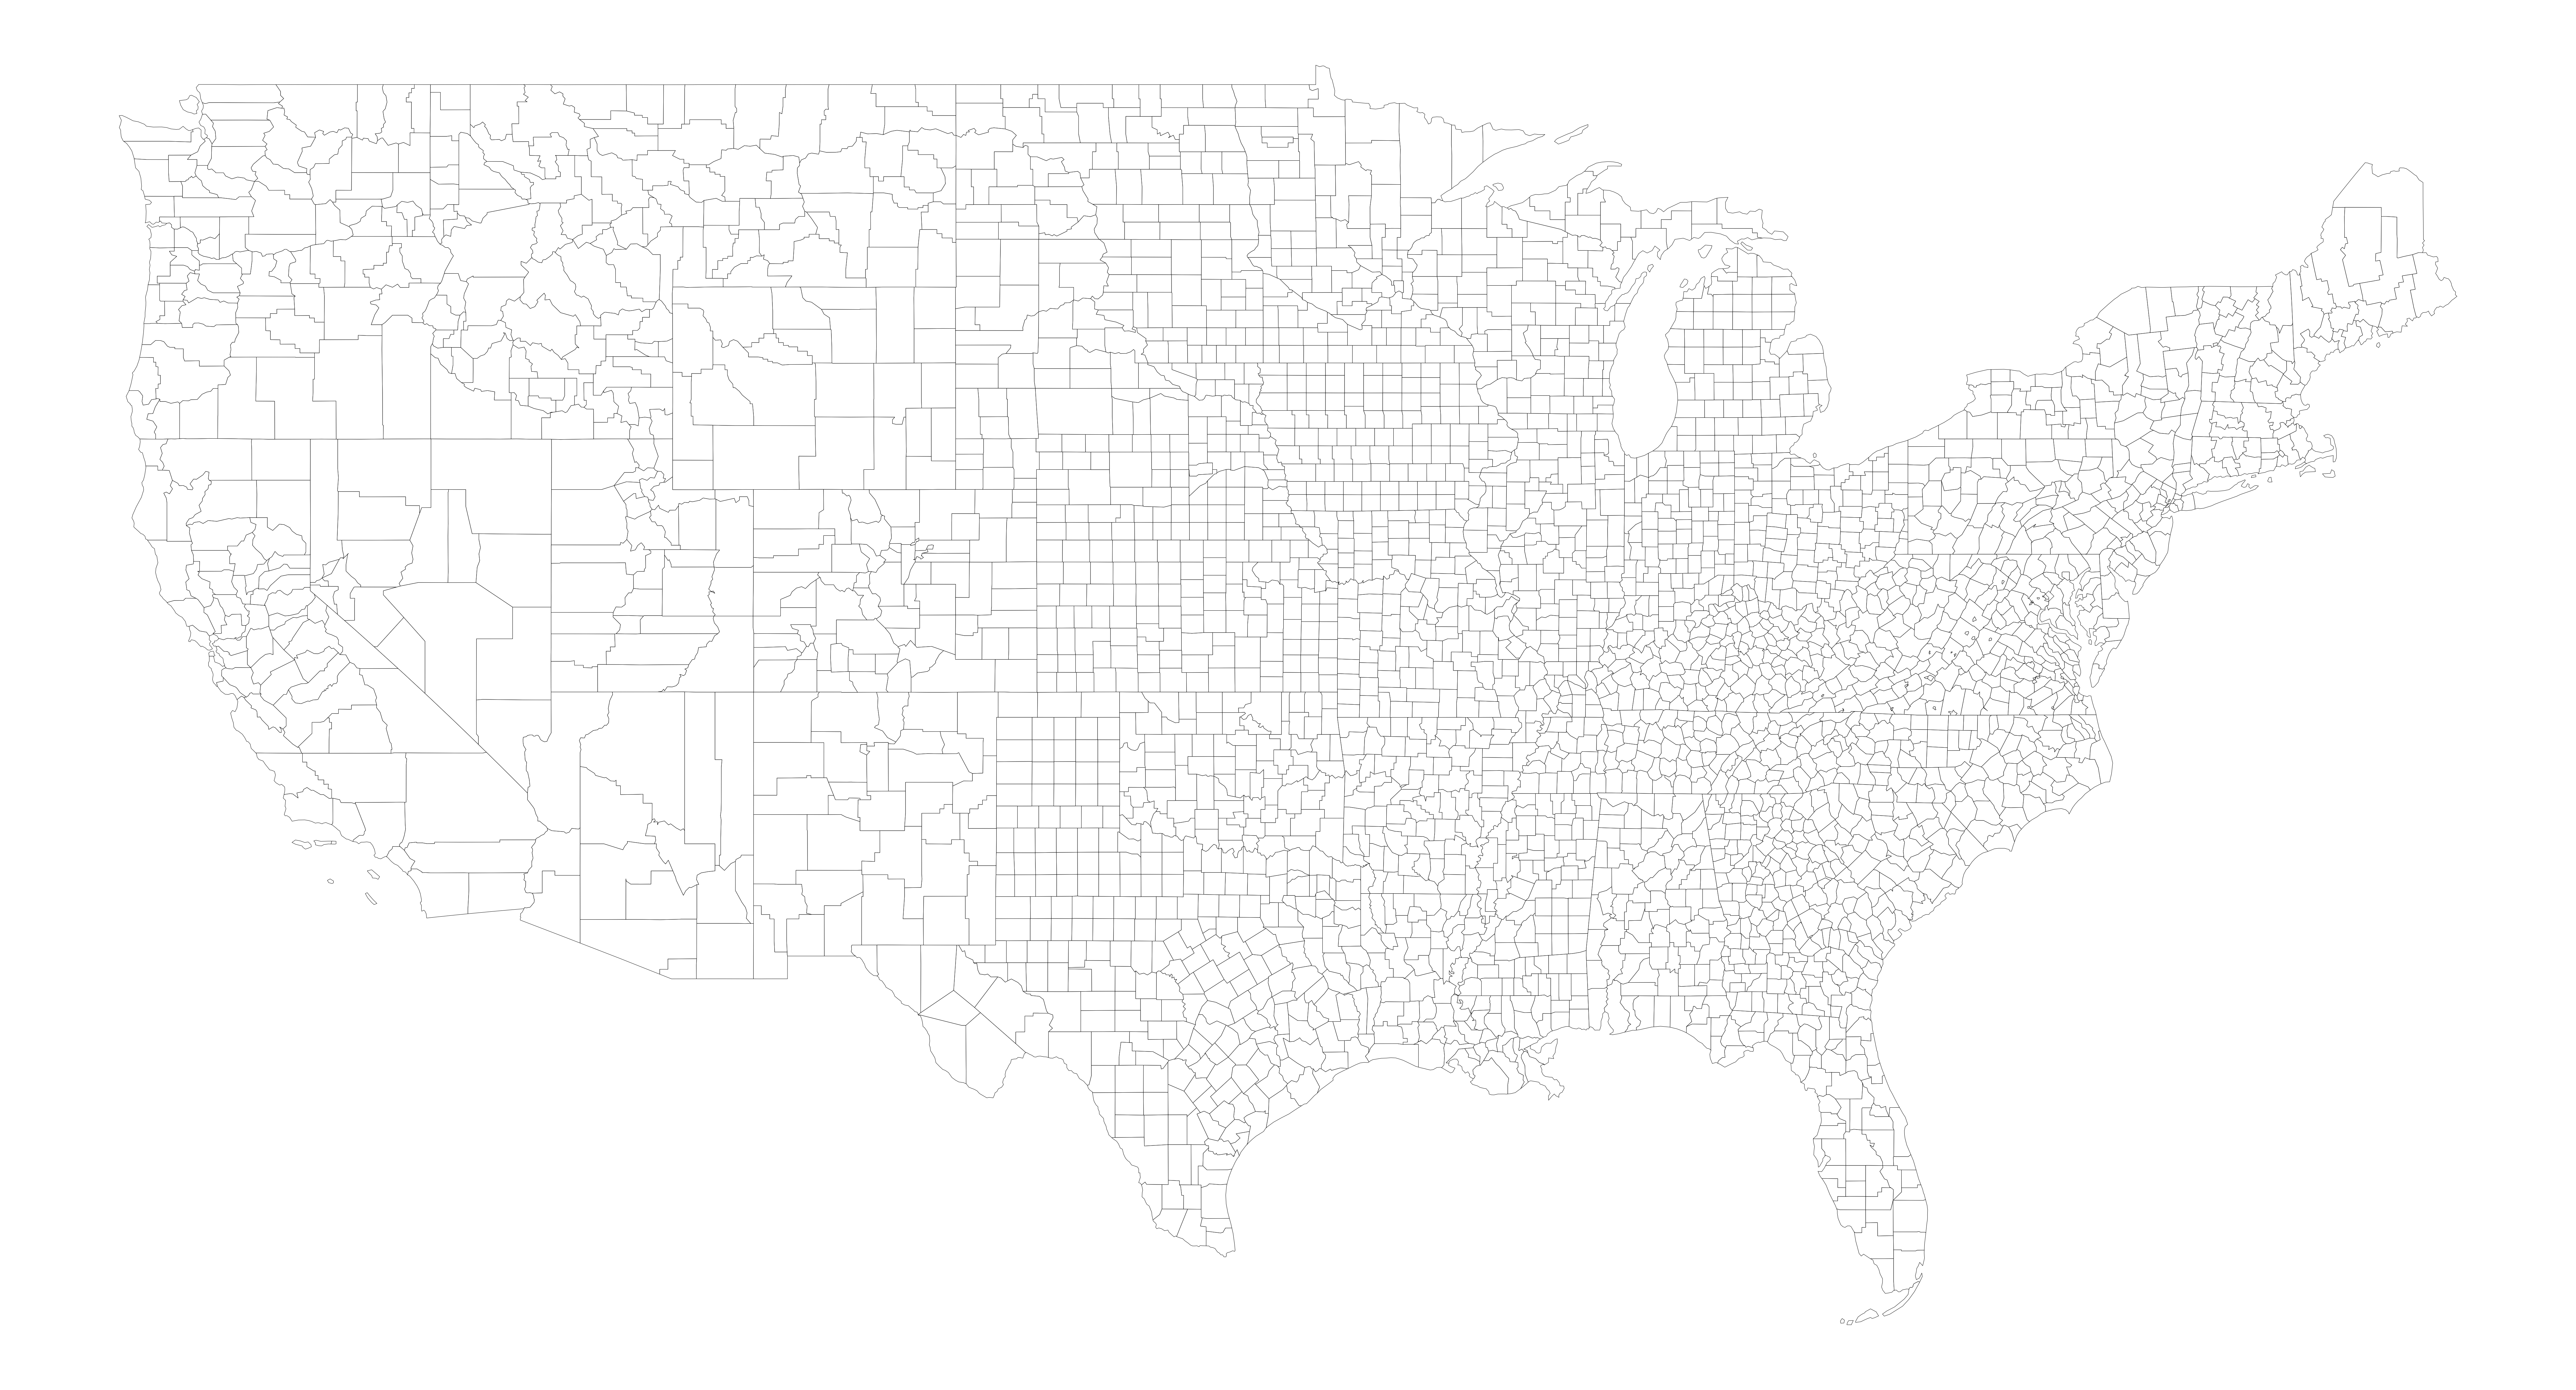

In [19]:
fig, ax = plt.subplots(figsize=(150,150))

ax = county_mask.plot(ax=ax, color='white', edgecolor='black')

ax.axis('off');

# Test on Chicago


In [20]:
universities_shp = os.path.join(path, 'Colleges_and_Universities-shp', 'Colleges_and_Universities.shp')
universities = geopandas.read_file(universities_shp)

In [21]:
universities.insert(6,'fips', universities['STATE'].map(us.states.mapping('abbr','fips')))
mask_contiguous_universities = universities['fips'].isin(contiguous_fips)
universities_mask = universities[mask_contiguous_universities]

In [22]:
uni_top= universities_mask.merge(rd_id_data_filter, how='inner', on='IPEDSID')
uni_top = uni_top.to_crs(county.crs)
uni_top

OBJECTID IPEDSID                                               NAME  \
0         270  139658                                   EMORY UNIVERSITY   
1         344  186380                   RUTGERS UNIVERSITY-NEW BRUNSWICK   
2         369  196088                              UNIVERSITY AT BUFFALO   
3         376  200697  AIR FORCE INSTITUTE OF TECHNOLOGY-GRADUATE SCH...   
4         523  142285                                UNIVERSITY OF IDAHO   
..        ...     ...                                                ...   
274      6610  111966  CHARLES R DREW UNIVERSITY OF MEDICINE AND SCIENCE   
275      6663  148511                                    RUSH UNIVERSITY   
276      6711  187967      NEW MEXICO INSTITUTE OF MINING AND TECHNOLOGY   
277      6790  159373  LOUISIANA STATE UNIVERSITY HEALTH SCIENCES CEN...   
278      6840  194824                   RENSSELAER POLYTECHNIC INSTITUTE   

                                           ADDRESS                  CITY  \
0    408 ADMINISTRATION BUILDING, 201 DOWMAN DRIVE               ATLANTA   
1                                   83 SOMERSET ST         NEW BRUNSWICK   
2                                    12 CAPEN HALL               BUFFALO   
3                                  2950 HOBSON WAY  WRIGHT-PATTERSON AFB   
4                      875 PERIMETER DRIVE MS 2282                MOSCOW   
..                                             ...                   ...   
274                                1731 E 120TH ST           LOS ANGELES   
275                     600 S. PAULINA ST. STE 440               CHICAGO   
276                                801 LEROY PLACE               SOCORRO   
277                                 433 BOLIVAR ST           NEW ORLEANS   
278                                     110 8TH ST                  TROY   

    STATE fips    ZIP           ZIP4       TELEPHONE  ... DORM_CAP TOT_EMP  \
0      GA   13  30322  NOT AVAILABLE  (404) 727-6123  ...     4695   12180   
1      NJ   34  08901           1281  (732) 932-1766  ...    15941   20189   
2      NY   36  14260           1660  (716) 645-2000  ...     7988    5424   
3      OH   39  45433           7765  (937) 255-3636  ...     -999    -999   
4      ID   16  83844           2282  (888) 884-3246  ...     2138    2651   
..    ...  ...    ...            ...             ...  ...      ...     ...   
274    CA   06  90059  NOT AVAILABLE  (323) 563-4800  ...     -999     557   
275    IL   17  60612  NOT AVAILABLE  (312) 942-7100  ...     -999    2312   
276    NM   35  87801  NOT AVAILABLE  (800) 428-8324  ...      807     856   
277    LA   22  70112           2223  (504) 568-4808  ...      460    2224   
278    NY   36  12180           3590  (518) 276-6000  ...     3930    1945   

        SHELTER_ID                     geometry  state_name      2019  \
0    NOT AVAILABLE   POINT (-84.32579 33.79328)     Georgia  707682.0   
1    NOT AVAILABLE   POINT (-74.44702 40.49953)  New Jersey  585114.0   
2    NOT AVAILABLE   POINT (-78.78961 43.00104)    New York  368399.0   
3    NOT AVAILABLE   POINT (-84.08256 39.78284)        Ohio   30283.0   
4    NOT AVAILABLE  POINT (-117.02425 46.72688)       Idaho  100693.0   
..             ...                          ...         ...       ...   
274  NOT AVAILABLE  POINT (-118.24278 33.92562)  California   12231.0   
275  NOT AVAILABLE   POINT (-87.66949 41.87354)    Illinois   85701.0   
276  NOT AVAILABLE  POINT (-106.90771 34.06623)  New Mexico   21914.0   
277  NOT AVAILABLE   POINT (-90.08315 29.95723)   Louisiana   36424.0   
278  NOT AVAILABLE   POINT (-73.67872 42.72899)    New York   92353.0   

         2015      2010 2000 1990  
0    558467.0  550879.0  NaN  NaN  
1    599886.0  445770.0  NaN  NaN  
2    365435.0  363820.0  NaN  NaN  
3     25638.0   32524.0  NaN  NaN  
4     93038.0   90736.0  NaN  NaN  
..        ...       ...  ...  ...  
274   13482.0   23048.0  NaN  NaN  
275   75436.0   76368.0  NaN  NaN  
276   25065.0   53788.0  NaN  NaN  
277  

# Ipywidget

In [23]:
# create widget options
options = {'North America':['Unemployment Rate', 'GDP per Capita'], 
           'USA':['Unemployment Rate', 'Personal Income per Capita']}

# create widget
first_widget = Dropdown(options=us_contiguous)
second_widget = Dropdown(options=['Population Growth', 'Personal Income per Capita'])
third_widget= IntSlider(value=2010, min=2000, max=2019, step=5)

#def update(*args):
   # second_widget.options = options[first_widget.value]
    
#first_widget.observe(update)
def state_level_uni_df(State, Year):
    state_county = county_mask[county_mask['STATE_NAME'] == State]
    state_uni_top = uni_top[uni_top.STATE == State]
    return state_county, state_uni_top
    
def plot_area(State, Indicator, Year):
    #https://jcutrer.com/python/learn-geopandas-plotting-usmaps
    fig, ax = plt.subplots(figsize=(20,20))

    il_df.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=12),axis=1)
    il_df.boundary.plot(ax=ax, color='Black', linewidth=2)
    il_df.plot(ax=ax,column = 'income_past12m', figsize=(12, 12), legend = True,
               cmap='OrRd',
               legend_kwds={'label': "per capital income",
                            'orientation': "vertical",})
    ax.text(-0.05, 0.5,'Illinois' , transform=ax.transAxes,
            fontsize=50, color='black', alpha=0.8,
            ha='center', va='center', rotation='90')

    uni_top_il.apply(
        lambda x: ax.annotate(
            s="Gov Fund: " + str(x['2010']), 
            xy= (x.geometry.centroid.coords[0][0]+0.01, x.geometry.centroid.coords[0][1]-0.007),
            ha='left', 
            color='#000077', # blue
            fontsize=10),axis=1)
    uni_top_il.plot(ax=ax, marker='*', color='green', markersize=600)g
    ax.axis('off'); 
        plt.show()
        
interact(plot_area, State=first_widget, Indicator=second_widget, Year=third_widget);

IndentationError: unexpected indent (1541684832.py, line 42)

# Illinois example

In [24]:
uni_top_il = uni_top[uni_top.STATE == 'IL']
income_2019_il = income_2019[income_2019['state_name'] == ' Illinois']
# income_2019_il['perc_INCOME'] = income_2019_il['income_past12m']/sum(income_2019_il['income_past12m'])
income_2019_il['county_name'] = income_2019_il['county_name'].str.replace(r' County', '')
county_mask_il = county_mask[county_mask['STATE_NAME'] == 'Illinois']
il_df = county_mask_il.merge(income_2019_il, how = 'inner', left_on ='NAME', right_on ='county_name')


NameError: name 'income_2019' is not defined

NameError: name 'il_df' is not defined

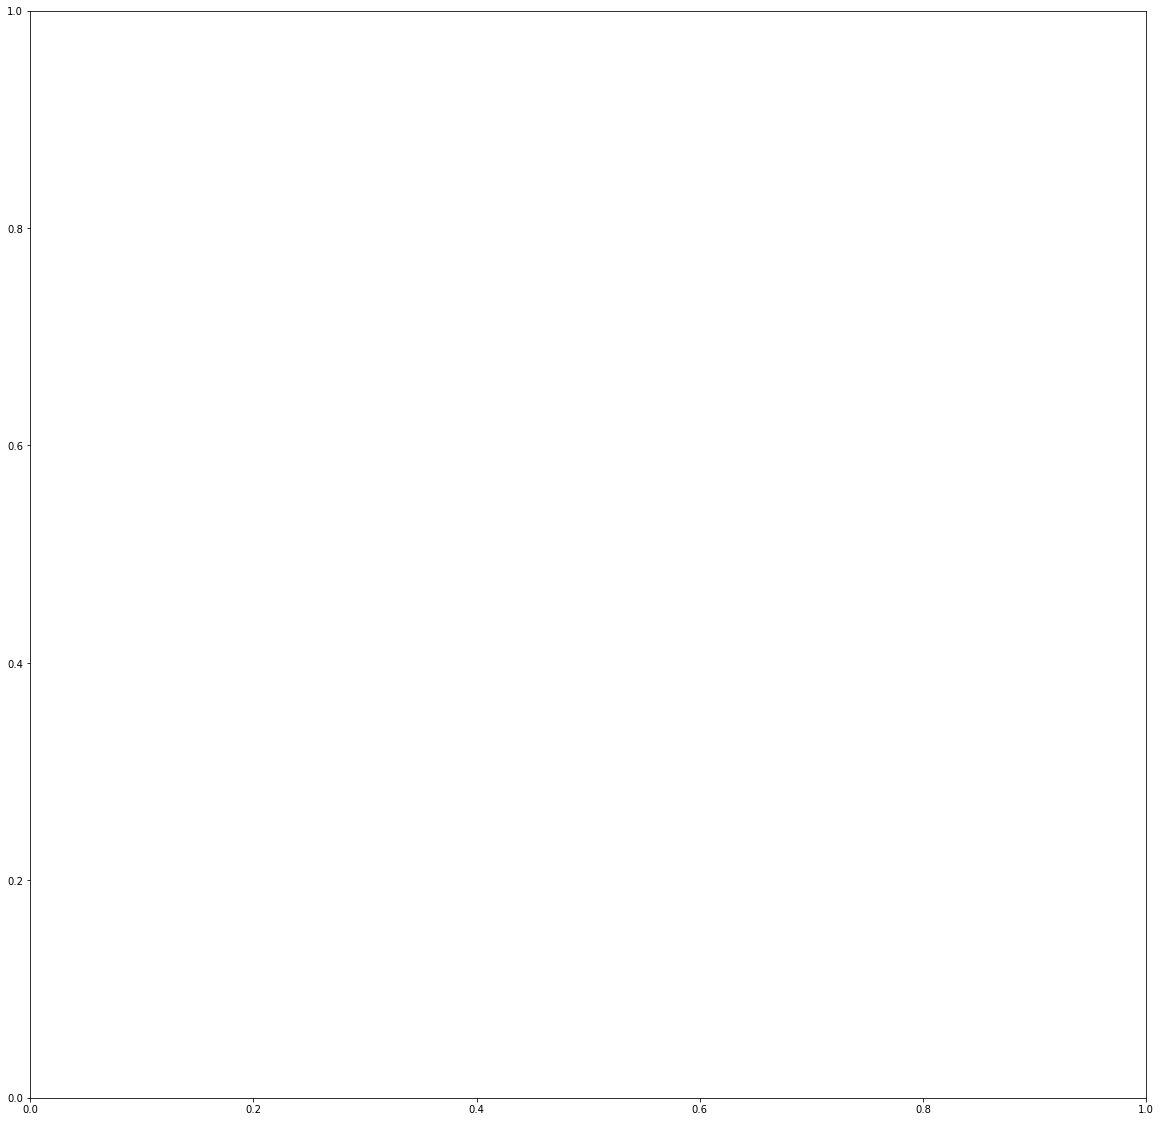

In [25]:
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps
fig, ax = plt.subplots(figsize=(20,20))

il_df.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=12),axis=1)
il_df.boundary.plot(ax=ax, color='Black', linewidth=2)
il_df.plot(ax=ax,column = 'income_past12m', figsize=(12, 12), legend = True,
           cmap='OrRd',
           legend_kwds={'label': "per capital income",
                        'orientation': "vertical",})
ax.text(-0.05, 0.5,'Illinois' , transform=ax.transAxes,
        fontsize=50, color='black', alpha=0.8,
        ha='center', va='center', rotation='90')

uni_top_il.apply(
    lambda x: ax.annotate(
        s="Gov Fund: " + str(x['2010']), 
        xy= (x.geometry.centroid.coords[0][0]+0.01, x.geometry.centroid.coords[0][1]-0.007),
        ha='left', 
        color='#000077', # blue
        fontsize=10),axis=1)
uni_top_il.plot(ax=ax, marker='*', color='green', markersize=600)
ax.axis('off');